In [21]:
class MyLR:
    def __init__(self):
        self.m = None
        self.n = None
        
    def fit(self,X_train,y_train):
        num = 0
        den = 0
        for i in range(X_train.shape[0]):
            num += ((X_train[i] - X_train.mean())*(y_train[i] - y_train.mean()))
            den += ((X_train[i] - X_train.mean())*(X_train[i] - X_train.mean()))
            
        self.m = num/den
        self.b = y_train.mean() - (self.m * X_train.mean())
        print(self.m)
        print(self.b)

    def predict(self,X_test):

        return self.m * X_test + self.b

In [4]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('placement.csv')

In [6]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [8]:
X = df.iloc[:,0].values
y = df.iloc[:,1].values

In [9]:
X

array([6.89, 5.12, 7.82, 7.42, 6.94, 7.89, 6.73, 6.75, 6.09, 8.31, 5.32,
       6.61, 8.94, 6.93, 7.73, 7.25, 6.84, 5.38, 6.94, 7.48, 7.28, 6.85,
       6.14, 6.19, 6.53, 7.28, 8.31, 5.42, 5.94, 7.15, 7.36, 8.1 , 6.96,
       6.35, 7.34, 6.87, 5.99, 5.9 , 8.62, 7.43, 9.38, 6.89, 5.95, 7.66,
       5.09, 7.87, 6.07, 5.84, 8.63, 8.87, 9.58, 9.26, 8.37, 6.47, 6.86,
       8.2 , 5.84, 6.6 , 6.92, 7.56, 5.61, 5.48, 6.34, 9.16, 7.36, 7.6 ,
       5.11, 6.51, 7.56, 7.3 , 5.79, 7.47, 7.78, 8.44, 6.85, 6.97, 6.94,
       8.99, 6.59, 7.18, 7.63, 6.1 , 5.58, 8.44, 4.26, 4.79, 7.61, 8.09,
       4.73, 6.42, 7.11, 6.22, 7.9 , 6.79, 5.83, 6.63, 7.11, 5.98, 7.69,
       6.61, 7.95, 6.71, 5.13, 7.05, 7.62, 6.66, 6.13, 6.33, 7.76, 7.77,
       8.18, 5.42, 8.58, 6.94, 5.84, 8.35, 9.04, 7.12, 7.4 , 7.39, 5.23,
       6.5 , 5.12, 5.1 , 6.06, 7.33, 5.91, 6.78, 7.93, 7.29, 6.68, 6.37,
       5.84, 6.05, 7.2 , 6.1 , 5.64, 7.14, 7.91, 7.19, 7.91, 6.76, 6.93,
       4.85, 6.17, 5.84, 6.07, 5.66, 7.57, 8.28, 6.

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state =2)

In [11]:
X_train.shape

(160,)

In [15]:
lr = MyLR()

In [16]:
lr.fit(X_train,y_train)
lr

(160,)


In [17]:
X_train.mean()

np.float64(6.989937500000001)

In [24]:
lr = MyLR()

In [25]:
lr.fit(X_train,y_train)
lr

0.5579519734250721
-0.8961119222429152


In [26]:
y_pred = lr.predict(X_test[0])
y_pred

np.float64(3.891116009744203)

## **Regression Metrics**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


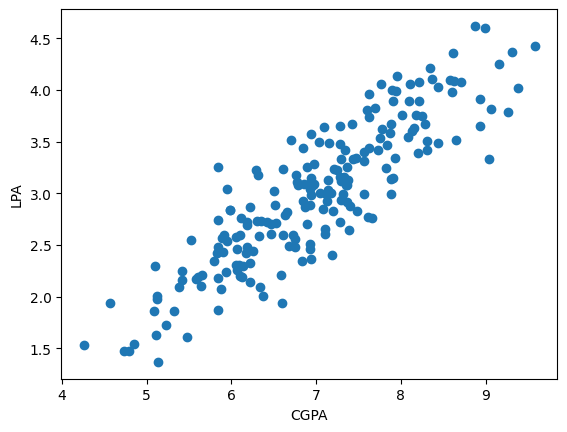

In [5]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('LPA')
plt.show()

In [23]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [25]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [26]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state= 2)

In [27]:
X_train.shape

(160, 1)

In [18]:
from sklearn.linear_model import LinearRegression

In [28]:
lr = LinearRegression()

In [29]:
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Text(0, 0.5, 'LPA')

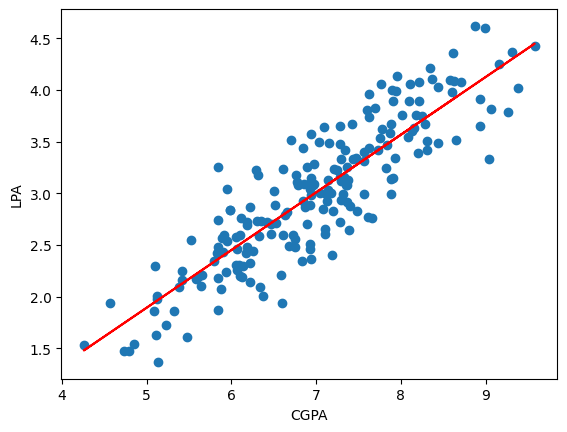

In [31]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('LPA')

In [33]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [39]:
y_pred = lr.predict(X_test)

In [40]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [41]:
print("MAE:",mean_absolute_error(y_test,y_pred))

MAE: 0.2884710931878175


In [46]:
print("MSE:", mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

MSE: 0.12129235313495527


In [47]:
print("r2_score:",r2_score(y_test,y_pred))

r2_score: 0.780730147510384


In [48]:
# Adjusted r2_score
X_test.shape

(40, 1)

In [50]:
adjusted_r2_score = 1 - ((1-r2)*(40-1))/(40-1-1)
adjusted_r2_score

0.7749598882343415